# Case 1 - Heart Disease Classification

**07.02.2021** Marja Satukangas<br>
Neural Networks for Health Technology Applications<br>
[Metropolia University of Applied Sciences](https://www.metropolia.fi/en)

## 1. Introduction

This experiment has been done to create a model to predict wheather a person has a heart disease or not.

The model has been trained by preprocessed cleveland dataset found from here https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/.

In [1]:
# Importing necessary libraries

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers.experimental import preprocessing


## 2. Dataset

The dataset used in the experiment has been downloaded from https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

Dataset has 14 variables. 13 of them are explanatory variables and one shows if the person has a disease or not. There are 303 rows of data in the dataset.

Values are all numerical. Some of them are binary values, some integers and some floats.

In [2]:

# Location of the original file
filelocation = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/"
clevelandfile = "processed.cleveland.data"

#column names
col_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'diagnose']

# Read the dataset 
dataset = pd.read_csv((filelocation+clevelandfile), names = col_names, na_values = '?')

# dataset to dataframe and show first 10 rows
df = pd.DataFrame(dataset)
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnose
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [3]:
#count values of each columns
df.count()

age         303
sex         303
cp          303
trestbps    303
chol        303
fbs         303
restecg     303
thalach     303
exang       303
oldpeak     303
slope       303
ca          299
thal        301
diagnose    303
dtype: int64

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [5]:
#check types of the variables
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
diagnose      int64
dtype: object

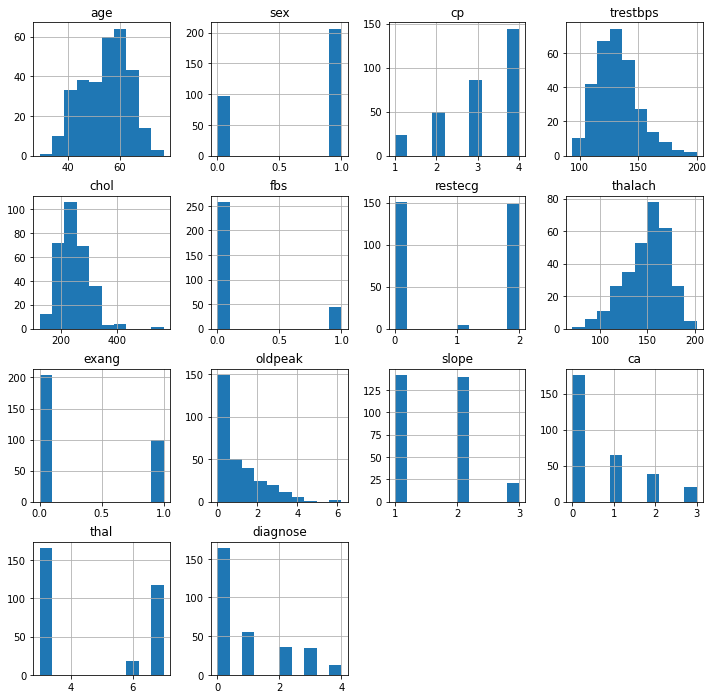

In [6]:
df.hist(figsize = (12, 12))
plt.show()

## 3. Preprocessing

### Handling missing values

There are 6 missing values, which are replaced with pad-method. The values are cathegorical values so there is no sense to replace them by a mean value.

In [7]:
#check missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
diagnose    0
dtype: int64

In [8]:
#replace missing values and check that they are replaced
df = dataset.fillna(method='pad')
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
diagnose    0
dtype: int64

In [9]:
# find out what unique values there are in diagnose column
df.diagnose.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [10]:
#transform diagnose values to binary values 0-1, values > 0 are considered to be 1 (disease)
df.diagnose = 1*(df.diagnose > 0)
df.diagnose.unique()

array([0, 1])

In [11]:
# count distribution of diagnose values 
df.diagnose.value_counts()

0    164
1    139
Name: diagnose, dtype: int64

### Split dataset into train and test sets

80% of the data were used as a training set and the rest 20% as test set.

In [12]:
# Split the data into train and test datasets
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)

### Separate features and labels

In [13]:
# Separate the features and labels
train_features = train_dataset.copy()
test_features = test_dataset.copy()

# Pop takes out the labels
train_labels = train_features.pop('diagnose')
test_labels = test_features.pop('diagnose')

train_labels

225    0
152    0
228    1
201    0
52     1
      ..
82     0
285    1
11     0
119    1
102    0
Name: diagnose, Length: 242, dtype: int32

### Normalize features

In [14]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_features))

In [15]:
#from sklearn import preprocessing

#minmax_scaler = preprocessing.MinMaxScaler()
#data_scaled = minmax_scaler.fit_transform(train_features)
#df_train_features = pd.DataFrame(data_scaled)
#df_train_features.head(10)

## 4. Modeling

The model used consists of input layer, one hidden layer and output layer. Hidden layer has 4 neurons.

Binary crossentropy is used as a loss function. It is suitable for binary problems. There are separate functions for value 0 and 1. When

label (Y) = 1:
Loss = -log(Ypred)

label (Y) = 0:
Loss = -log(1-Ypred)

'Adam' optimizer is used as an optimizer. 

To find the best model, different kinds of compositions of layers and neurons were tested. When the model became more complicated, overfitting happened and because of that the model was decided to keep simple.

In [16]:
NUM_FEATURES = len(train_features.columns)
HIDDEN_LAYERS = round(np.sqrt(NUM_FEATURES + 1))
OUTPUT_LAYER = 1

In [17]:

model = keras.Sequential(
    [
        normalizer,
        layers.Dense(NUM_FEATURES, activation = 'relu', name = "input"),
        layers.Dense(HIDDEN_LAYERS, activation = 'relu', name = "hidden1"),
        #layers.Dense(HIDDEN_LAYERS, activation = 'relu', name = "hidden2"),
        #layers.Dense(HIDDEN_LAYERS, activation = 'relu', name = "hidden3"),
        layers.Dense(OUTPUT_LAYER, activation = 'sigmoid', name = "output")
    ]
)

model.compile(loss=losses.BinaryCrossentropy(),    
              optimizer='adam',                     
              metrics=tf.metrics.BinaryAccuracy())

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 13)                27        
_________________________________________________________________
input (Dense)                (None, 13)                182       
_________________________________________________________________
hidden1 (Dense)              (None, 4)                 56        
_________________________________________________________________
output (Dense)               (None, 1)                 5         
Total params: 270
Trainable params: 243
Non-trainable params: 27
_________________________________________________________________


## 5. Training

Model was trained with 50 epochs and batch size 10. With more epochs the model got overfitted. Also different batch sizes were tested but with 8 batch size the best accuracy was achieved.

20% of training set was used as a validation set.

In [18]:
%%time
h = model.fit(train_features, train_labels,
                   epochs = 50,
                   batch_size = 10,
                   verbose = 0,
                   validation_split = 0.2)

Wall time: 2.29 s


## 6. Evaluation and performance

From the loss and accuracy plots one can see that at epoch 40 training set starts to get better results than validation set. This means that when the model has been trained this much, it learns the particular features of training set and starts to get overfitted.

In the end after 50 epochs the loss for validation set is 0.39 and accuracy 0.86.

In [19]:
# Check what is in the history datastructure
h_dict = h.history
h_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

In [30]:
pd.DataFrame(h_dict).tail()

,loss,binary_accuracy,val_loss,val_binary_accuracy
45,0.339391,0.849741,0.378443,0.816327
46,0.335713,0.854922,0.382137,0.816327
47,0.332746,0.854922,0.384974,0.816327
48,0.329845,0.865285,0.387887,0.816327
49,0.327426,0.860104,0.388891,0.816327


### Plot the training and validation loss

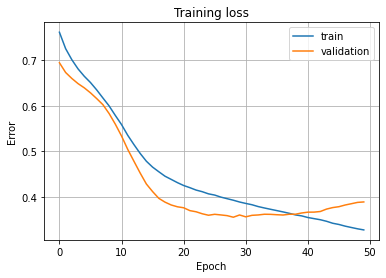

In [20]:
def plot_loss(h):
    
    plt.plot(h.history['loss'], label='train')
    plt.plot(h.history['val_loss'], label='validation')
    plt.title('Training loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)
    
plot_loss(h)

### Plot the training and validation accuracy

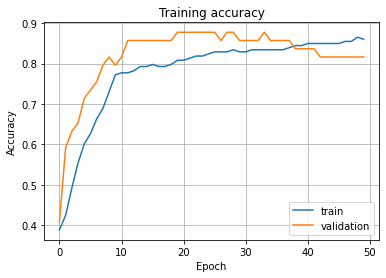

In [21]:
def plot_accuracy(h):
    
    plt.plot(h.history['binary_accuracy'], label='train')
    plt.plot(h.history['val_binary_accuracy'], label='validation')
    #plt.ylim([0, 10])
    plt.title('Training accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

plot_accuracy(h)

### Evaluate the performance

Test set had 61 instances. Metrics show that accuracy with test set is 0.87 and error 0.26. Also other metrics were calculated and results are shown below. 

In [22]:
test_results = model.evaluate(test_features, test_labels, verbose=1)
test_results

2/2 [==============================] - 0s 997us/step - loss: 0.2555 - binary_accuracy: 0.8689


[0.25553199648857117, 0.868852436542511]

In [23]:
print("Test results (error):    {:.3f}".format(test_results[0]))
print("Test results (accuracy): {:.3f}".format(test_results[1]))

Test results (error):    0.256
Test results (accuracy): 0.869


### Metrics

In [24]:
# generate classification report
from sklearn.metrics import classification_report, accuracy_score
 
test_pred = np.round(model.predict(test_features)).astype(int)

print('Classification report')
print(classification_report(test_labels, test_pred))

Classification report
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        34
           1       0.85      0.85      0.85        27

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [25]:
#confusion matrix
cf=confusion_matrix(test_pred, test_labels)
cf

array([[30,  4],
       [ 4, 23]], dtype=int64)

<AxesSubplot:>

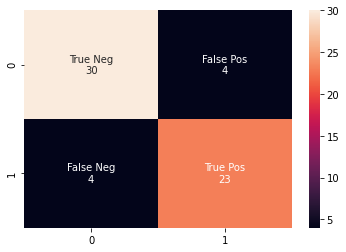

In [26]:

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
                                                    
labels = np.asarray(labels).reshape(2,2)
   
sns.heatmap(cf, annot=labels, fmt='')


You might need to calculate something more. For more details, see:

- [tf.keras.metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)
- [sklearn.metrics](https://scikit-learn.org/stable/modules/model_evaluation.html)
- [Classification metrics in scikit-learn](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)

## 7. Conclusions

The model that achieved the best accuracy (0.87) with test set consisted of three layers. Hidden layer had 4 neurons. Sigmoid function was used as an activation function and error was calculated with BinaryCrossentropy-function. BinaryAccuracy ws used to calculate accuracy during training.

The final accuracy and other metrics were calculated with separate test set that had 61 instances.

50 epochs were used for training. More epochs caused overfitting.

Quite good results were achieved by the model but it could be improved for example by adding the number of instances. Now only 194 instances were used to train the model and the rest 48 were used for validation and testing.